In [1]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import seaborn as sns;sns.set()
import imgkit

In [2]:
file = "traffic_data.csv"

In [3]:
original_df = pd.read_csv(file)
original_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190211527,5/18/2019,5/18/2019,110,2,Rampart,279,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,33.0,F,H,101.0,STREET,UNION,JAMES M WOOD,"(34.0508, -118.2731)"
1,110518459,10/11/2011,10/11/2011,1735,5,Harbor,505,997,TRAFFIC COLLISION,506,27.0,F,O,101.0,STREET,VERMONT,KNOX,"(33.8542, -118.2905)"
2,180618348,8/9/2018,8/9/2018,1830,6,Hollywood,665,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4006,33.0,M,W,101.0,STREET,FRANKLIN AV,ARGYLE,"(34.1052, -118.3252)"
3,120312271,5/9/2012,5/9/2012,845,3,Southwest,331,997,TRAFFIC COLLISION,NaN,51.0,M,B,101.0,STREET,LA BREA AV,JEFFERSON BL,"(34.0255, -118.3548)"
4,121215287,6/13/2012,6/13/2012,745,12,77th Street,1208,997,TRAFFIC COLLISION,605,48.0,F,B,101.0,STREET,48TH ST,FIGUEROA,"(33.9997, -118.2827)"


In [4]:
renamed_df = original_df.rename(columns={"DR Number":"DR_Number",
                                         "Date Reported":"Date_Reported",
                                         "Date Occurred":"Date_Occurred",
                                         "Time Occurred":"Time_Occurred",
                                         "Area ID":"Area_ID",
                                         "Area Name":"Area_Name",
                                         "Reporting District":"Reporting_District",
                                         "Crime Code":"Crime_Code",
                                         "Crime Code Description":"Crime_Code_Description",
                                         "MO Codes":"MO_Codes",
                                         "Victim Age":"Victim_Age",
                                         "Victim Sex":"Victim_Sex",
                                         "Victim Descent":"Victim_Descent",
                                         "Premise Code":"Premise_Code",
                                         "Premise Description":"Premise_Description",
                                         "Cross Street":"Cross_Street",
                                         })
renamed_df.head()

,DR_Number,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Address,Cross_Street,Location
0,190211527,5/18/2019,5/18/2019,110,2,Rampart,279,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,33.0,F,H,101.0,STREET,UNION,JAMES M WOOD,"(34.0508, -118.2731)"
1,110518459,10/11/2011,10/11/2011,1735,5,Harbor,505,997,TRAFFIC COLLISION,506,27.0,F,O,101.0,STREET,VERMONT,KNOX,"(33.8542, -118.2905)"
2,180618348,8/9/2018,8/9/2018,1830,6,Hollywood,665,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4006,33.0,M,W,101.0,STREET,FRANKLIN AV,ARGYLE,"(34.1052, -118.3252)"
3,120312271,5/9/2012,5/9/2012,845,3,Southwest,331,997,TRAFFIC COLLISION,NaN,51.0,M,B,101.0,STREET,LA BREA AV,JEFFERSON BL,"(34.0255, -118.3548)"
4,121215287,6/13/2012,6/13/2012,745,12,77th Street,1208,997,TRAFFIC COLLISION,605,48.0,F,B,101.0,STREET,48TH ST,FIGUEROA,"(33.9997, -118.2827)"


In [5]:
# change to datetime format

renamed_df.Date_Occurred = pd.to_datetime(renamed_df.Date_Occurred).dt.strftime('%Y-%m-%d')
renamed_df.Date_Reported = pd.to_datetime(renamed_df.Date_Reported).dt.strftime('%Y-%m-%d')
renamed_df.head()

,DR_Number,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Address,Cross_Street,Location
0,190211527,2019-05-18,2019-05-18,110,2,Rampart,279,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,33.0,F,H,101.0,STREET,UNION,JAMES M WOOD,"(34.0508, -118.2731)"
1,110518459,2011-10-11,2011-10-11,1735,5,Harbor,505,997,TRAFFIC COLLISION,506,27.0,F,O,101.0,STREET,VERMONT,KNOX,"(33.8542, -118.2905)"
2,180618348,2018-08-09,2018-08-09,1830,6,Hollywood,665,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4006,33.0,M,W,101.0,STREET,FRANKLIN AV,ARGYLE,"(34.1052, -118.3252)"
3,120312271,2012-05-09,2012-05-09,845,3,Southwest,331,997,TRAFFIC COLLISION,NaN,51.0,M,B,101.0,STREET,LA BREA AV,JEFFERSON BL,"(34.0255, -118.3548)"
4,121215287,2012-06-13,2012-06-13,745,12,77th Street,1208,997,TRAFFIC COLLISION,605,48.0,F,B,101.0,STREET,48TH ST,FIGUEROA,"(33.9997, -118.2827)"


In [6]:
#filter only for 2019 
occurred_df = renamed_df.loc[renamed_df['Date_Occurred'].between('2019-01-01','2019-12-31', inclusive=True)]
sorted_df = occurred_df.sort_values("Date_Occurred", ascending=True).reset_index(drop=True)
sorted_df.head()

,DR_Number,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Address,Cross_Street,Location
0,191704034,2019-01-01,2019-01-01,1930,17,Devonshire,1774,997,TRAFFIC COLLISION,NaN,23.0,F,H,101.0,STREET,LA BREA AV,WASHINGTON BL,"(34.2428, -118.5253)"
1,191504179,2019-01-04,2019-01-01,5,15,N Hollywood,1514,997,TRAFFIC COLLISION,3006 3030 3028 3037 3101 3401 3701 4026,30.0,M,H,101.0,STREET,GENTRY AV,VANOWEN ST,"(34.194, -118.3932)"
2,192104002,2019-01-01,2019-01-01,720,21,Topanga,2129,997,TRAFFIC COLLISION,3011 3025 3034 3037 3101 3401 3701 4026 3039,NaN,M,W,101.0,STREET,ROSCOE BL,WINNETKA AV,"(34.2202, -118.571)"
3,191504198,2019-01-01,2019-01-01,1500,15,N Hollywood,1526,997,TRAFFIC COLLISION,0605 3101 3004 3036 3030 3028 3401 3701 4015,74.0,M,H,101.0,STREET,VICTORY BL,TUJUNGA AV,"(34.1867, -118.379)"
4,190404052,2019-01-02,2019-01-01,2230,4,Hollenbeck,469,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030 0605,23.0,F,H,101.0,STREET,1ST ST,SAVANNAH ST,"(34.0333, -118.1946)"


In [7]:
#Drop both Date_Reported and Victim_Descent
sorted_df = sorted_df.drop(sorted_df[["Date_Reported","Victim_Descent"]], axis=1)
sorted_df.head(1)

,DR_Number,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,Victim_Age,Victim_Sex,Premise_Code,Premise_Description,Address,Cross_Street,Location
0,191704034,2019-01-01,1930,17,Devonshire,1774,997,TRAFFIC COLLISION,NaN,23.0,F,101.0,STREET,LA BREA AV,WASHINGTON BL,"(34.2428, -118.5253)"


In [8]:
#Drop all NA 
cleaned_df = sorted_df.dropna()
cleaned_df.count()

DR_Number                 46756
Date_Occurred             46756
Time_Occurred             46756
Area_ID                   46756
Area_Name                 46756
Reporting_District        46756
Crime_Code                46756
Crime_Code_Description    46756
MO_Codes                  46756
Victim_Age                46756
Victim_Sex                46756
Premise_Code              46756
Premise_Description       46756
Address                   46756
Cross_Street              46756
Location                  46756
dtype: int64

In [9]:
#Make into dataframe
cleaned_df= pd.DataFrame(cleaned_df)
cleaned_df.head()

,DR_Number,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,Victim_Age,Victim_Sex,Premise_Code,Premise_Description,Address,Cross_Street,Location
1,191504179,2019-01-01,5,15,N Hollywood,1514,997,TRAFFIC COLLISION,3006 3030 3028 3037 3101 3401 3701 4026,30.0,M,101.0,STREET,GENTRY AV,VANOWEN ST,"(34.194, -118.3932)"
3,191504198,2019-01-01,1500,15,N Hollywood,1526,997,TRAFFIC COLLISION,0605 3101 3004 3036 3030 3028 3401 3701 4015,74.0,M,101.0,STREET,VICTORY BL,TUJUNGA AV,"(34.1867, -118.379)"
4,190404052,2019-01-01,2230,4,Hollenbeck,469,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030 0605,23.0,F,101.0,STREET,1ST ST,SAVANNAH ST,"(34.0333, -118.1946)"
5,190404036,2019-01-01,1200,4,Hollenbeck,477,997,TRAFFIC COLLISION,3101 3401 3701 3004 3026 3036,72.0,M,101.0,STREET,WHITTIER,ORME,"(34.0325, -118.2115)"
7,192104017,2019-01-01,1340,21,Topanga,2134,997,TRAFFIC COLLISION,3004 3037 3034 3025 3101 3401 3701 4026,46.0,F,101.0,STREET,CARLSON CI,SHERMAN WY,"(34.201, -118.6129)"


In [10]:
#Drop () in Location column
cleaned_location = cleaned_df.Location.str.strip("()")
cleaned_df["Location"] = cleaned_location
cleaned_df.head(1)

,DR_Number,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,Victim_Age,Victim_Sex,Premise_Code,Premise_Description,Address,Cross_Street,Location
1,191504179,2019-01-01,5,15,N Hollywood,1514,997,TRAFFIC COLLISION,3006 3030 3028 3037 3101 3401 3701 4026,30.0,M,101.0,STREET,GENTRY AV,VANOWEN ST,"34.194, -118.3932"


In [11]:
#Append to separate lat & long column for easy access 

lat = []
lon = []

for row in cleaned_df['Location']:
    try:
        lat.append(row.split(',')[0])
        lon.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lon.append(np.Nan)

cleaned_df['Latitude'] = lat
cleaned_df['Longitude'] = lon

cleaned_traffic_df = pd.DataFrame(cleaned_df)
cleaned_traffic_df.head(3)

,DR_Number,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,Victim_Age,Victim_Sex,Premise_Code,Premise_Description,Address,Cross_Street,Location,Latitude,Longitude
1,191504179,2019-01-01,5,15,N Hollywood,1514,997,TRAFFIC COLLISION,3006 3030 3028 3037 3101 3401 3701 4026,30.0,M,101.0,STREET,GENTRY AV,VANOWEN ST,"34.194, -118.3932",34.194,-118.3932
3,191504198,2019-01-01,1500,15,N Hollywood,1526,997,TRAFFIC COLLISION,0605 3101 3004 3036 3030 3028 3401 3701 4015,74.0,M,101.0,STREET,VICTORY BL,TUJUNGA AV,"34.1867, -118.379",34.1867,-118.379
4,190404052,2019-01-01,2230,4,Hollenbeck,469,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030 0605,23.0,F,101.0,STREET,1ST ST,SAVANNAH ST,"34.0333, -118.1946",34.0333,-118.1946


In [12]:
#Check for unique in Victim_Sex
cleaned_traffic_df.Victim_Sex.unique()

array(['M', 'F', 'N', 'X', 'H'], dtype=object)

In [13]:
#Change Victim_Sex into others to cause less confusion

cleaned_traffic_df["Victim_Sex"]=cleaned_traffic_df["Victim_Sex"].replace(["N","X","H"], "Others")
cleaned_traffic_df.Victim_Sex.unique()


In [14]:
#export out to work with cleaner data

file = "cleaned_traffic_data.csv"
df = pd.read_csv(file,index_col=0)

#Check for time
print(df.Time_Occurred.max())
print(df.Time_Occurred.min())

2359
1


In [15]:
#Put time into multiple groups for easy access 
bins = [1,
        59,
        159,
        259,
        359,
        459,
        559,
        659,
        759,
        859,
        959,
        1059,
        1159,
        1259,
        1359,
        1459,
        1559,
        1659,
        1759,
        1859,
        1959,
        2059,
        2159,
        2259,
        2359]
groups_labels = ["12:00 AM",
                 "1:00 AM",
                 "2:00 AM",
                 "3:00 AM",
                 "4:00 AM",
                 "5:00 AM",
                 "6:00 AM",
                 "7:00 AM",
                 "8:00 AM",
                 "9:00 AM",
                 "10:00 AM",
                 "11:00 AM",
                 "12:00 PM",
                 "01:00 PM",
                 "02:00 PM",
                 "03:00 PM",
                 "04:00 PM",
                 "05:00 PM",
                 "06:00 PM",
                 "07:00 PM",
                 "08:00 PM",
                 "09:00 PM",
                 "10:00 PM",
                 "11:00 PM"
                 ]
df["Time_of_Day"] = pd.cut(df["Time_Occurred"], bins, labels=groups_labels,include_lowest=True)

#rearrange columns to list
df = df [['DR_Number', 'Date_Occurred', 'Time_Occurred','Time_of_Day', 'Area_ID', 'Area_Name',
       'Reporting_District', 'Crime_Code', 'Crime_Code_Description',
       'MO_Codes', 'Victim_Age', 'Victim_Sex', 'Premise_Code',
       'Premise_Description', 'Address', 'Cross_Street', 'Location',
       'Latitude', 'Longitude']]

df.to_csv("updated_traffic_data.csv")

In [81]:
df["Date_Occurred"] = pd.to_datetime(df["Date_Occurred"])
df.head(3)

,DR_Number,Date_Occurred,Time_Occurred,Time_of_Day,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,Victim_Age,Victim_Sex,Premise_Code,Premise_Description,Address,Cross_Street,Location,Latitude,Longitude
1,191504179,2019-01-01,5,12:00 AM,15,N Hollywood,1514,997,TRAFFIC COLLISION,3006 3030 3028 3037 3101 3401 3701 4026,30.0,M,101.0,STREET,GENTRY AV,VANOWEN ST,"34.194, -118.3932",34.1940,-118.3932
3,191504198,2019-01-01,1500,03:00 PM,15,N Hollywood,1526,997,TRAFFIC COLLISION,0605 3101 3004 3036 3030 3028 3401 3701 4015,74.0,M,101.0,STREET,VICTORY BL,TUJUNGA AV,"34.1867, -118.379",34.1867,-118.3790
4,190404052,2019-01-01,2230,10:00 PM,4,Hollenbeck,469,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030 0605,23.0,F,101.0,STREET,1ST ST,SAVANNAH ST,"34.0333, -118.1946",34.0333,-118.1946


In [94]:
#Check fatality rate during each hours

Time_of_day_grouped = df.groupby(["Time_of_Day"], as_index=False)["DR_Number"].count()
Time_of_day_grouped = Time_of_day_grouped.rename(columns={"DR_Number":"Number_of_Death"})

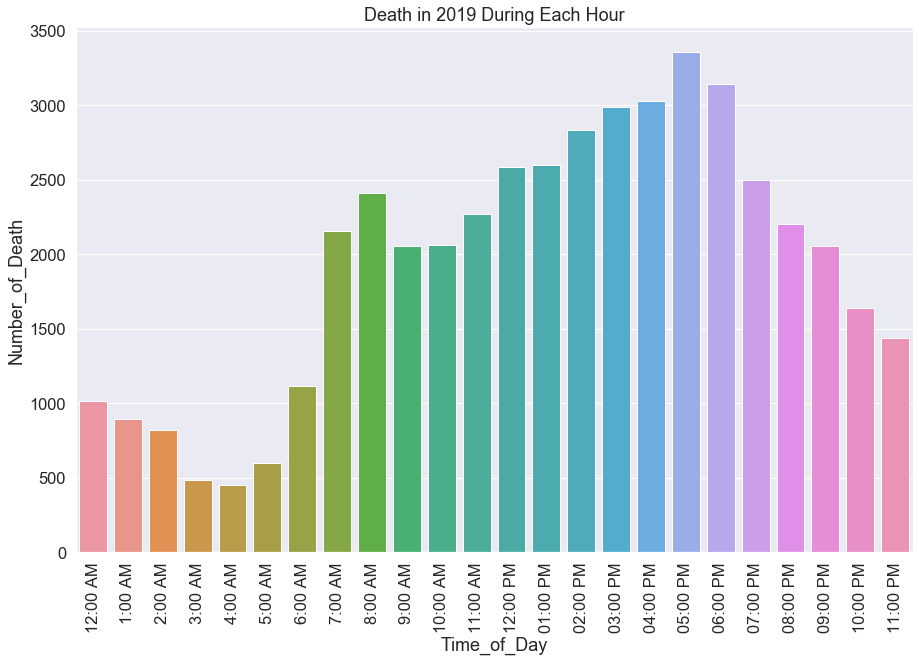

In [124]:
#Graph using seaborn

sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
plt.gcf().subplots_adjust(bottom=0.15)
ax = sns.barplot(x = "Time_of_Day", y = "Number_of_Death", data = Time_of_day_grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Death in 2019 During Each Hour")

plt.savefig("Total_death_per_hour.png")

In [135]:
joined_df_file = "cr/joined_traffic_weather.csv"
joined_df = pd.read_csv(joined_df_file)
joined_df = joined_df.loc[:,["Date","Precipitation","DR_Number","Victim_Sex","Latitude","Longitude"]]
joined_df["Date"]= pd.to_datetime(joined_df["Date"])

#Check for total Precipitation
Total_Precipitation = joined_df.groupby(joined_df["Date"].dt.strftime("%B"))["Precipitation"].sum().sort_values(ascending=False).reset_index()
Total_Precipitation

#Check for total Death per Month
Total_Death = joined_df.groupby(joined_df["Date"].dt.strftime("%B"))["DR_Number"].count().sort_values(ascending=False).reset_index()
Total_Death

Total = pd.merge(Total_Precipitation,Total_Death, on="Date")
Total = Total.sort_values(by=["DR_Number"], ascending=True)
Total = Total.rename(columns={"DR_Number":"Total Death","Date":"Month"})
Total = Total.reset_index(drop=True)
Total.to_csv("Total_Death_vs_Precip.csv")

In [2]:
DeathvsPrecip_location = "Total_Death_vs_Precip.csv"
Death_Precip_df = pd.read_csv(DeathvsPrecip_location,index_col=0)
Death_Precip_df.head()

,Month,Precipitation,Total Death
0,January,750.09,3624
1,February,770.80,3570
2,March,292.83,3912
3,April,2.50,3691
4,May,106.76,3945


In [1]:
# fig, axis = plt.subplots(2,1, figsize = (20,10))
# plt.gcf().subplots_adjust(bottom=0.15)

# a = Death_Precip_df["Month"].values
# b = Death_Precip_df["Precipitation"].values
# c = Death_Precip_df["Total Death"].values

# sns.lineplot(x =a , y= b, data = Death_Precip_df, ax = axis[0])
# sns.lineplot(x =a, y= c, data = Death_Precip_df, ax = axis[1])
# # death.set_xticklabels(death.get_xticklabels(), rotation=90)

In [16]:
set_index = Death_Precip_df.set_index("Month")
set_index = set_index.rename(lambda x: x.strip())
set_index

,Precipitation,Total Death
Month,,
January,750.09,3624
February,770.80,3570
March,292.83,3912
April,2.50,3691
May,106.76,3945
June,0.00,3741
July,0.00,4102
August,0.00,4140
September,3.42,4126


In [12]:
cm = sns.light_palette("seagreen", as_cmap=True)
styled_table = Death_Precip_df.style.background_gradient(cmap=cm)

styled_table

# html = styled_table.render()
# imgkit.from_string(html, 'Summary_table.png')

,Month,Precipitation,Total Death
0,January,750.090000,3624
1,February,770.800000,3570
2,March,292.830000,3912
3,April,2.500000,3691
4,May,106.760000,3945
5,June,0.000000,3741
6,July,0.000000,4102
7,August,0.000000,4140
8,September,3.420000,4126
9,October,0.000000,4194


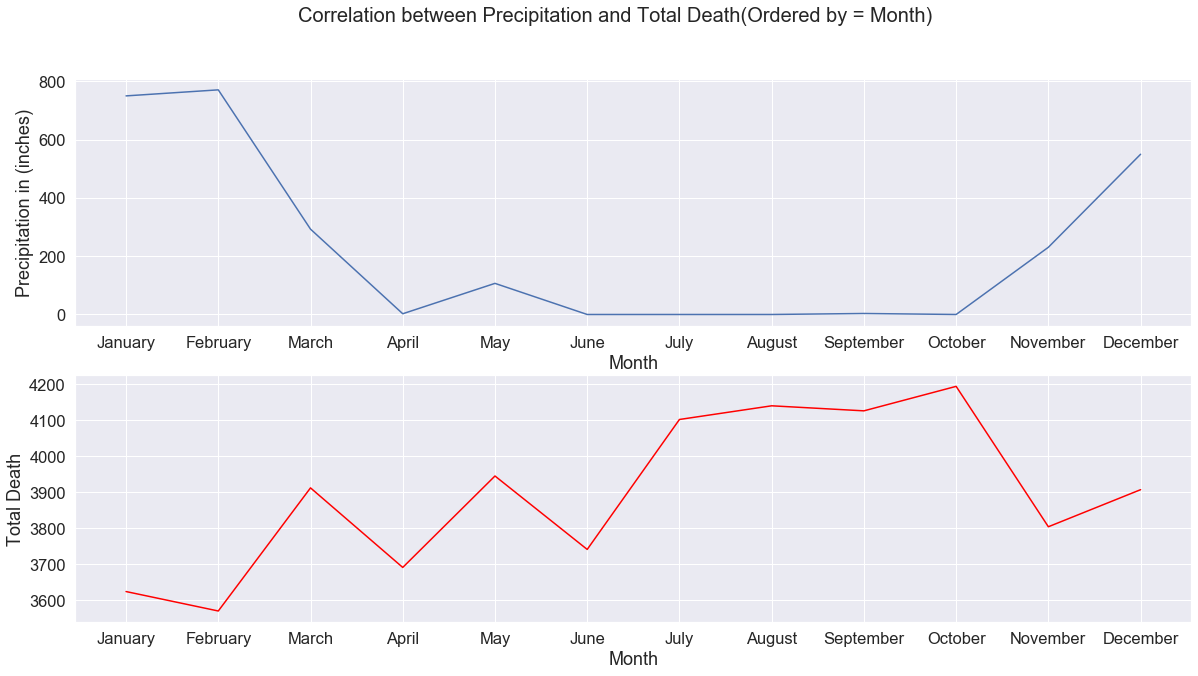

In [155]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(Death_Precip_df["Month"],Death_Precip_df["Precipitation"])
fig.suptitle('Correlation between Precipitation and Total Death(Ordered by = Month)', fontsize=20)
plt.ylabel("Precipitation in (inches)",fontsize=18)
plt.xlabel("Month",fontsize=18)

plt.subplot(2,1,2)
plt.plot(Death_Precip_df["Month"],Death_Precip_df["Total Death"],color="red")
plt.ylabel("Total Death",fontsize=18)
plt.xlabel("Month",fontsize=18)

fig.savefig('PrecipationVsDeath.png')

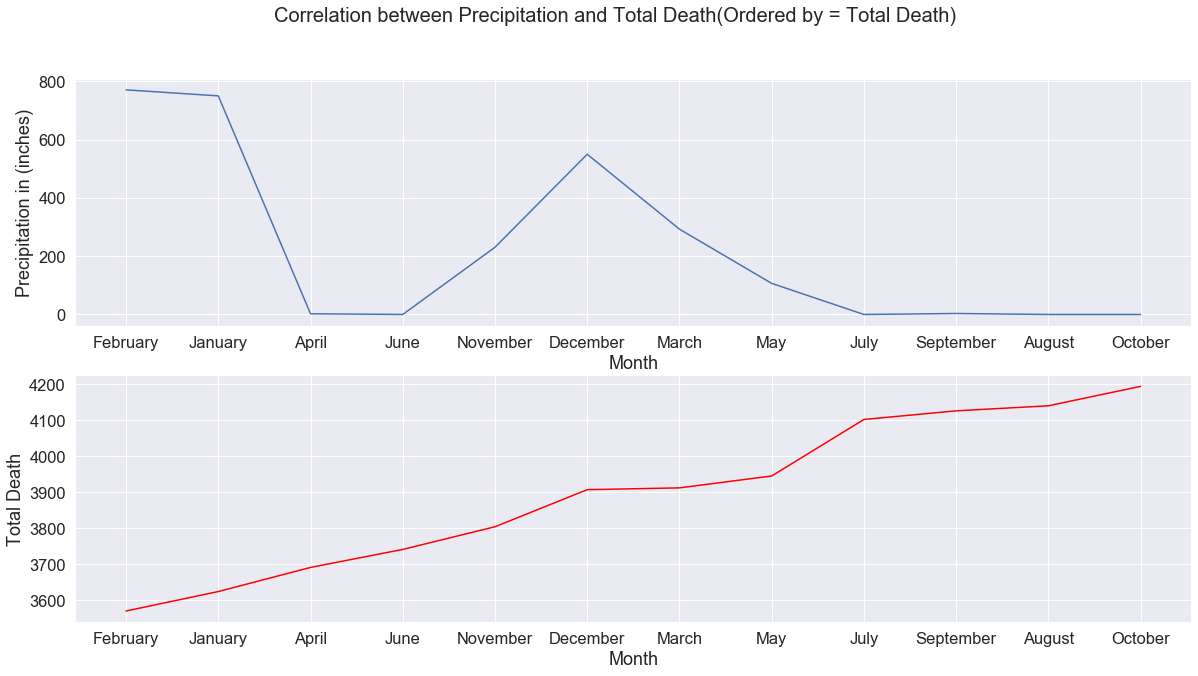

In [154]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(Total["Month"],Total["Precipitation"])
fig.suptitle('Correlation between Precipitation and Total Death(Ordered by = Total Death)', fontsize=20)
plt.ylabel("Precipitation in (inches)",fontsize=18)
plt.xlabel("Month",fontsize=18)

plt.subplot(2,1,2)
plt.plot(Total["Month"],Total["Total Death"],color="red")
plt.ylabel("Total Death",fontsize=18)
plt.xlabel("Month",fontsize=18)

fig.savefig('PrecipationVsDeath2.png')

In [26]:
#create bins and group for time

# bins = [1,300,600,900,1200,1500,1800,2100,2400]

# groups_labels = ["12:00AM-3:00AM","3:01AM-6:00AM","6:01AM-9:00AM","9:01AM-12:00PM",
#                  "12:01PM-3:00PM","3:01PM-6:00PM","6:01PM-9:00PM","9:01PM-11:59PM"]

# df["Time_of_Day"] = pd.cut(df["Time_Occurred"], bins, labels=groups_labels,include_lowest=True)

In [27]:
#rearrange columns to list
# df = df [['DR_Number', 'Date_Occurred', 'Time_Occurred','Time_of_Day', 'Area_ID', 'Area_Name',
#        'Reporting_District', 'Crime_Code', 'Crime_Code_Description',
#        'MO_Codes', 'Victim_Age', 'Victim_Sex', 'Premise_Code',
#        'Premise_Description', 'Address', 'Cross_Street', 'Location',
#        'Latitude', 'Longitude']]
# df
# df.to_csv("updated_traffic_data.csv")

In [28]:
# wrong_time_df = cleaned_traffic_df[cleaned_traffic_df.Time_Occurred < 1000]

# wrong_time_df.head()


# n = wrong_time_df.Victim_Sex.count()

# for i in range(n):
#     if len(wrong_time_df["Time_Occurred"][i]) < 10:
#         wrong_time_df["Time_Occurred"][i] = wrong_time_df["Time_Occurred"][i] + "000"

#     elif len(wrong_time_df["Time_Occurred"][i]) < 100:
#         wrong_time_df["Time_Occurred"][i] = wrong_time_df["Time_Occurred"][i] + "00"

#     else: 
#         wrong_time_df["Time_Occurred"][i] = wrong_time_df["Time_Occurred"][i] + "0"

# len(wrong_time_df.Time_Occurred[1])
# wrong_time_df["Time_Occurred"][1]

# while i > len(wrong_time_df["Time_Occurred"]):
#     if len(wrong_time_df["Time_Occurred"]) < 10:
#         wrong_time_df["Time_Occurred"] = wrong_time_df["Time_Occurred"] + "000"
#     elif len(wrong_time_df["Time_Occurred"]) < 100:
#         wrong_time_df["Time_Occurred"] = wrong_time_df["Time_Occurred"] + "00"
#     else: 
#         wrong_time_df["Time_Occurred"] = wrong_time_df["Time_Occurred"] + "000"

# wrong_time_df.Time_Occurred[1]

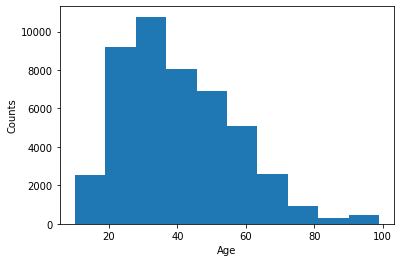

NormaltestResult(statistic=4299.465972113258, pvalue=0.0)


In [29]:
# victim age
plt.hist(cleaned_df['Victim_Age'])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(cleaned_df["Victim_Age"].sample(46575)))

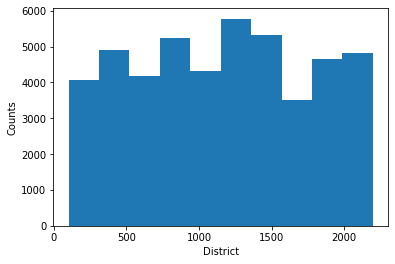

NormaltestResult(statistic=22460.634943273453, pvalue=0.0)


In [30]:
# reporting district
plt.hist(cleaned_df['Reporting_District'])
plt.xlabel('District')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(cleaned_df["Reporting_District"].sample(46575)))

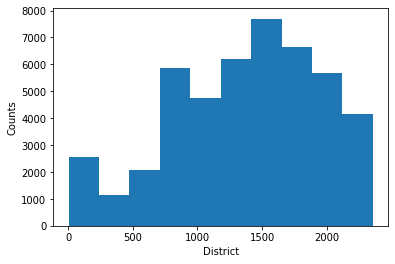

NormaltestResult(statistic=2230.8461254043295, pvalue=0.0)


In [31]:
# time occurred
plt.hist(cleaned_df['Time_Occurred'])
plt.xlabel('District')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(cleaned_df["Time_Occurred"].sample(46575)))

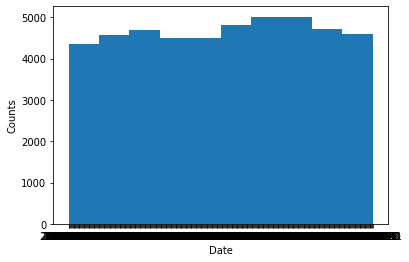

NormaltestResult(statistic=2235.368728741952, pvalue=0.0)


In [32]:
# date occurred
plt.hist(cleaned_df["Date_Occurred"])
plt.xlabel('Date')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(cleaned_df["Time_Occurred"].sample(46575)))

In [33]:
cleaned_df.to_csv("cleaned_traffic_data.csv")